1) Importing all necessary packages for Dataframe Manipulation

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from functools import reduce

import matplotlib.pyplot as plt

import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2) Loading all Datasets used for Predictions

In [2]:
metadata_url = 'https://raw.githubusercontent.com/Lucy-Moctezuma/ML-Tutorial-for-Antibiotic-Resistance-Predictions-for-E.-Coli/main/Datasets/Metadata.csv'
gene_presence_url = 'https://raw.githubusercontent.com/Lucy-Moctezuma/ML-Tutorial-for-Antibiotic-Resistance-Predictions-for-E.-Coli/main/Datasets/AccessoryGene.csv'

metadata = pd.read_csv(metadata_url)
gene_presence_data = pd.read_csv(gene_presence_url)

In [3]:
metadata.head()

Lane.accession   MLST     Isolate    Year CTZ  CTX  AMP AMX AMC TZP CXM  \
0      ERR435312   68.0  11679_6#21  2001.0   S  NaN  NaN   S   S   S   R   
1      ERR434919  652.0  11658_6#85  2005.0   S    S  NaN   S   S   S   S   
2      ERR434399   95.0  11657_6#45  2005.0   S    S  NaN   R   R   R   S   
3      ERR434695   73.0  11658_4#53  2005.0   S    S  NaN   R   S   S   S   
4      ERR434696   73.0  11658_4#54  2005.0   S    S  NaN   R   S   S   S   

   CET GEN  TBM  TMP CIP  
0  NaN   R  NaN  NaN   R  
1  NaN   S  NaN  NaN   S  
2  NaN   S  NaN  NaN   S  
3  NaN   S  NaN  NaN   S  
4  NaN   S  NaN  NaN   S

In [4]:
metadata.shape

(1936, 16)

In [5]:
mlst_list = metadata["MLST"].unique()
mlst_list = mlst_list[np.logical_not(np.isnan(mlst_list))]
print(sorted(mlst_list))
print(len(mlst_list))

[np.float64(-52.0), np.float64(-49.0), np.float64(-48.0), np.float64(-47.0), np.float64(-44.0), np.float64(3.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(14.0), np.float64(20.0), np.float64(23.0), np.float64(28.0), np.float64(34.0), np.float64(38.0), np.float64(43.0), np.float64(44.0), np.float64(46.0), np.float64(48.0), np.float64(57.0), np.float64(58.0), np.float64(59.0), np.float64(62.0), np.float64(68.0), np.float64(69.0), np.float64(70.0), np.float64(73.0), np.float64(74.0), np.float64(75.0), np.float64(79.0), np.float64(80.0), np.float64(83.0), np.float64(86.0), np.float64(88.0), np.float64(90.0), np.float64(91.0), np.float64(93.0), np.float64(95.0), np.float64(100.0), np.float64(101.0), np.float64(104.0), np.float64(106.0), np.float64(115.0), np.float64(117.0), np.float64(121.0), np.float64(124.0), np.float64(126.0), np.float64(127.0), np.float64(129.0), np.float64(130.0), np.float64(131.0), np.float64(135.0), np.float64(136.0), np.float64(141.0), np.floa

<Axes: title={'center': '15 most common Sequence Types in Data'}, ylabel='MLST'>

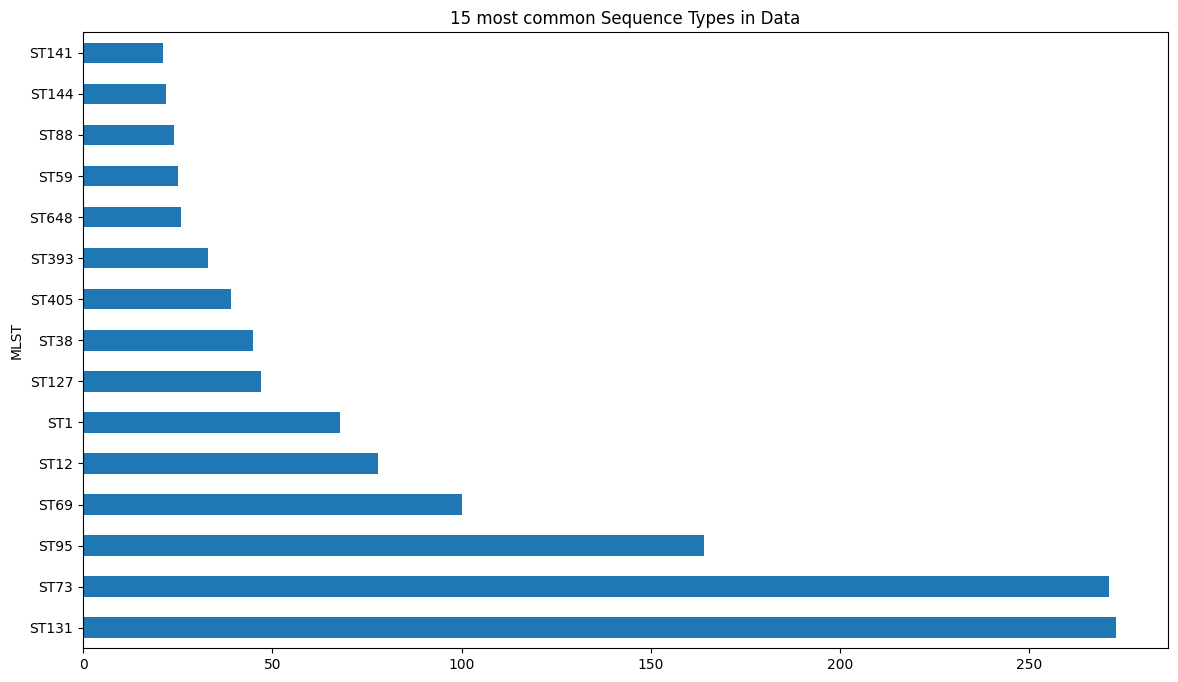

In [6]:
if is_numeric_dtype(metadata['MLST']):
  metadata['MLST'] = 'ST' + metadata['MLST'].astype(str)
  metadata['MLST'] = metadata['MLST'].map(lambda x: x.rstrip('.0'))
else:
  metadata['MLST']

bplotdata = metadata['MLST'].value_counts().sort_values(ascending = False).head(15)
bplotdata.plot(kind='barh',figsize=(14,8),title="15 most common Sequence Types in Data")

In [7]:
metadata['AMX'].value_counts()

AMX
R    662
S    432
Name: count, dtype: int64

In [8]:
gene_presence_data.head()

Unnamed: 0  yeiU  yhhS  ybaE  eutR  ibrB  ytfP  aslB  narQ  tolR  ...  \
0   11657_5#1     1     1     1     1     1     1     1     1     1  ...   
1  11657_5#10     1     1     1     1     1     1     1     1     1  ...   
2  11657_5#11     1     1     1     1     1     1     1     1     1  ...   
3  11657_5#12     1     1     1     1     1     1     1     1     1  ...   
4  11657_5#13     1     1     1     1     1     1     1     1     1  ...   

   group_48768  group_48873  group_48916  group_48933  group_48937  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   group_48958  group_49020  group_49174  group_49253  group_49257  
0            0            0            0            0            0  
1            0            0            0            0            0  
2            0            0            0            0            0  
3            0            0            0            0            0  
4            0            0            0            0            0  

[5 rows x 17199 columns]

In [9]:
named_genes = [col for col in gene_presence_data.drop(columns=["Unnamed: 0"]).columns if 'group' not in col]
print("List of named_genes:")
print(named_genes)
print("Total number of named genes included: ", len(named_genes))

List of named_genes:
['yeiU', 'yhhS', 'ybaE', 'eutR', 'ibrB', 'ytfP', 'aslB', 'narQ', 'tolR', 'galM', 'modB', 'pgl', 'glnQ', 'ydjM', 'osmE', 'rcsF', 'fruB', 'rsuA', 'yfcA', 'ypfN', 'pdxJ', 'plsX', 'ycfF', 'minD', 'marC_2', 'sugE', 'psd', 'nsrR', 'rnfA', 'kbl', 'greB', 'mgsA', 'mukE', 'dtd', 'cpxP', 'fbp', 'luxS', 'fldB', 'epd', 'phoR', 'adk', 'ybbN', 'ilvM', 'ilvE', 'fre', 'glmM', 'gpt', 'aaeX', 'ygcM', 'rplS', 'raiA', 'cvrA', 'hflC_2', 'mgtA', 'speC_2', 'yfeK', 'fsr', 'trmA', 'cmr', 'yceL', 'flgE', 'narG', 'ptsA', 'dmlR_6', 'mutS', 'ybgC', 'moaC', 'artM_1', 'agp', 'sdaA', 'ruvC', 'pgsA', 'yecF', 'yaeT', 'ftsQ', 'ksgA', 'ytjA', 'sanA', 'ccmG', 'nuoK', 'suhB', 'yfiD', 'rpmF', 'fabG_3', 'lolD_2', 'prfA', 'frdC', 'ftsE', 'ycaR', 'cmk', 'fepC', 'ftsB', 'hypA', 'xerD_1', 'rsmE', 'xseB', 'ybaZ', 'ybaB', 'ptsN', 'yeeX', 'yhbP', 'gmr_1', 'sgrR', 'poxB', 'putA', 'clpA', 'ypdC_1', 'pdxK', 'folM', 'ugpB', 'astA', 'yeiA', 'flgK', 'rne', 'chaA', 'mobB', 'ebgA', 'allS_1', 'chaC', 'pdxY', 'yciH', 'rf

In [10]:
other_genes = [col for col in gene_presence_data.drop(columns=["Unnamed: 0"]).columns if 'group' in col]
print("List of unnamed genes:")
print(other_genes)
print("Total number of unnamed genes included: ", len(other_genes))

List of unnamed genes:
['group_1150', 'group_16546', 'group_2705', 'group_3304', 'group_4923', 'group_4964', 'group_5584', 'group_8156', 'group_8252', 'group_149', 'group_2086', 'group_4319', 'group_5721', 'group_6765', 'group_6877', 'group_698', 'group_8153', 'group_16576', 'group_2284', 'group_6886', 'group_8258', 'group_944', 'group_11031', 'group_1129', 'group_1555', 'group_16561', 'group_2491', 'group_5642', 'group_6779', 'group_776', 'group_10930', 'group_2199', 'group_2731', 'group_4247', 'group_4302', 'group_1533', 'group_1556', 'group_2333', 'group_2498', 'group_2757', 'group_3978', 'group_781', 'group_817', 'group_1153', 'group_1304', 'group_1320', 'group_3797', 'group_6621', 'group_4315', 'group_1139', 'group_4791', 'group_1752', 'group_2311', 'group_3038', 'group_3099', 'group_3784', 'group_4906', 'group_6713', 'group_6771', 'group_1132', 'group_6802', 'group_10939', 'group_1390', 'group_472', 'group_3791', 'group_1518', 'group_3896', 'group_1558', 'group_137', 'group_3451'

In [11]:
print(gene_presence_data[gene_presence_data["group_13605" ]== 1]["Unnamed: 0"])

222      11657_7#39
895      11679_4#73
922      11679_5#10
1066     11679_6#56
1739    24742_1#155
1881    24742_1#295
1883    24742_1#297
1912    24742_1#324
Name: Unnamed: 0, dtype: object


In [13]:
gene_presence_data.shape

(2033, 17199)

3) Final dataset used in subsequent notebooks

In [14]:
gene_presence_data.rename(columns={'Unnamed: 0': 'Isolate'}, inplace=True)

df_list = [metadata,gene_presence_data]

Drug_df = reduce(lambda  left,right: pd.merge(left,right,on=['Isolate'], how='inner'), df_list)
Drug_df.head()

Lane.accession   MLST     Isolate    Year CTZ  CTX  AMP AMX AMC TZP  ...  \
0      ERR435312   ST68  11679_6#21  2001.0   S  NaN  NaN   S   S   S  ...   
1      ERR434919  ST652  11658_6#85  2005.0   S    S  NaN   S   S   S  ...   
2      ERR434399   ST95  11657_6#45  2005.0   S    S  NaN   R   R   R  ...   
3      ERR434695   ST73  11658_4#53  2005.0   S    S  NaN   R   S   S  ...   
4      ERR434696   ST73  11658_4#54  2005.0   S    S  NaN   R   S   S  ...   

  group_48768 group_48873 group_48916 group_48933 group_48937 group_48958  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   group_49020  group_49174  group_49253  group_49257  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 17214 columns]

In [15]:
Drug_df.drop(columns=["Lane.accession"], axis=1, inplace=True)
Drug_df.head()

MLST     Isolate    Year CTZ  CTX  AMP AMX AMC TZP CXM  ... group_48768  \
0   ST68  11679_6#21  2001.0   S  NaN  NaN   S   S   S   R  ...           0   
1  ST652  11658_6#85  2005.0   S    S  NaN   S   S   S   S  ...           0   
2   ST95  11657_6#45  2005.0   S    S  NaN   R   R   R   S  ...           0   
3   ST73  11658_4#53  2005.0   S    S  NaN   R   S   S   S  ...           0   
4   ST73  11658_4#54  2005.0   S    S  NaN   R   S   S   S  ...           0   

  group_48873 group_48916 group_48933 group_48937  group_48958  group_49020  \
0           0           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            0   

   group_49174  group_49253  group_49257  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 17213 columns]

In [16]:
print(Drug_df.columns)
                       
print("Final shape of combined dataframe",Drug_df.shape)

Index(['MLST', 'Isolate', 'Year', 'CTZ', 'CTX', 'AMP', 'AMX', 'AMC', 'TZP',
       'CXM',
       ...
       'group_48768', 'group_48873', 'group_48916', 'group_48933',
       'group_48937', 'group_48958', 'group_49020', 'group_49174',
       'group_49253', 'group_49257'],
      dtype='object', length=17213)
Final shape of combined dataframe (1936, 17213)


In [17]:
try:
  os.mkdir('/content/drive/My Drive/EColi_ML_CSV_files')

  path = '/content/drive/My Drive/EColi_ML_CSV_files/'

  Drug_df.to_csv(path+"EColi_Merged_df.csv", index= False)

except:
  print("Directory and file have already been created")

Directory and file have already been created
